## Weekly activity
1. Create a **random noise color and grayscale** image. You can set your own width and height, but keep the total number of pixels of both images identical.

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

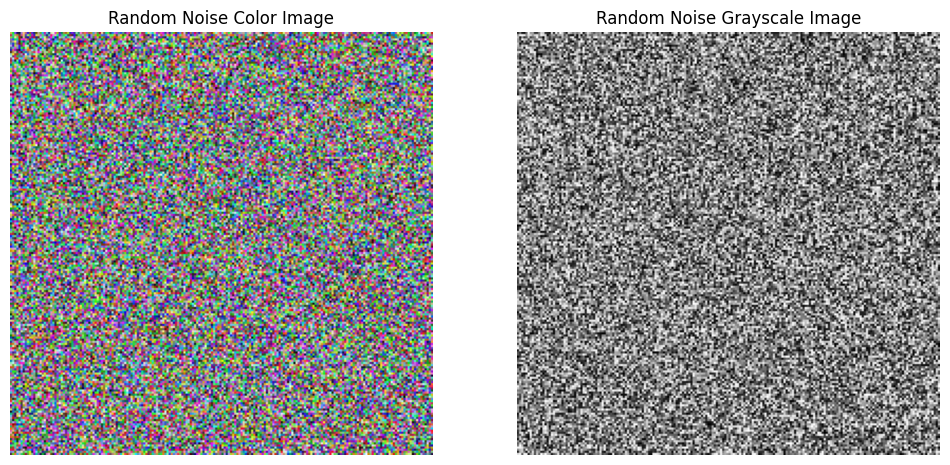

In [14]:
# Question 1
width, height = 200, 200 

# Create a random noise color image 
color_image = np.random.rand(height, width, 3)

# Create a random noise grayscale image
grayscale_image = np.random.rand(height, width)

# Display the images
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

axis[0].imshow(color_image)
axis[0].set_title('Random Noise Color Image')
axis[0].axis('off')

axis[1].imshow(grayscale_image, cmap='gray')
axis[1].set_title('Random Noise Grayscale Image')
axis[1].axis('off')

plt.show()

2. Convert the code chunk found under section <a href="#Section1">Divide an image into smaller patches using cropping</a> into a function with the following signature:
```python
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
 # img is the source image
 # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
 # line_color is the color of the grid line.
 # The output of the function should be image with grids
```


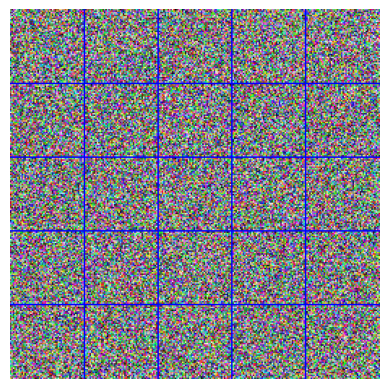

In [16]:
#Question 2
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color=(0, 255, 0)):
    """
    Divide an image into smaller patches using cropping and overlay grid lines.

    Parameters:
    - img: The source image (numpy array).
    - num_horizontal_grid: Number of patches along the horizontal axis.
    - num_vertical_grid: Number of patches along the vertical axis.
    - line_color: Color of the grid lines in BGR format (default is green).

    Returns:
    - img_with_grid: Image with overlaid grid lines.
    """

    img_copy = img.copy()
    height, width = img.shape[:2]

    # Calculate the size of each patch
    patch_height = height // num_vertical_grid
    patch_width = width // num_horizontal_grid

    # Draw grid lines
    for i in range(1, num_horizontal_grid):
        x = i * patch_width
        cv.line(img_copy, (x, 0), (x, height), line_color, 1)

    for j in range(1, num_vertical_grid):
        y = j * patch_height
        cv.line(img_copy, (0, y), (width, y), line_color, 1)

    return img_copy

# Example usage:
# Create a random noise image
height, width = 256, 256
img = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)

# Set the grid parameters
num_horizontal_grid = 5
num_vertical_grid = 5
line_color = (255, 0, 0)  # Red color for grid lines

# Get the image with grid lines
grid_img = crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)

# Display the result
plt.imshow(cv.cvtColor(grid_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

3. How would you *change the brightness* of a **color image**? Suggest **two ways** to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.


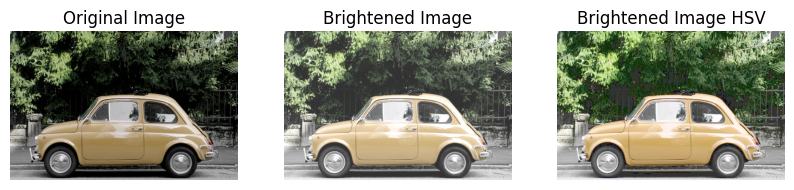

In [25]:
#Question 3

def brightness(img, value):
    img_bright = cv.convertScaleAbs(img, alpha=1, beta=value)
    return img_bright

def brightness_hsv(img, value):
    #convert the image to hsv
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv) 
    # add the value
    v = cv.add(v, value) 
    v = np.clip(v, 0, 255)  
    final_hsv = cv.merge((h, s, v)) 
    #back to bgr
    img_bright = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR) 
    return img_bright

img = cv.imread("images/car.jpg")

image1 = brightness(img, value)
image2 = brightness_hsv(img, value)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Brightened Image')
plt.axis('off')
plt.imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.title('Brightened Image HSV')
plt.axis('off')
plt.imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB))

plt.show()

4. Provide at least one common use cases for the following color spaces:
    - RGB
    - HSV
    - CIELAB

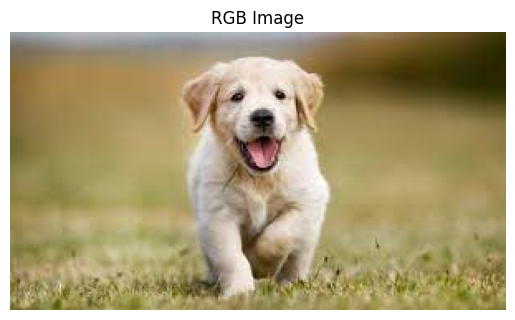

In [28]:
# Question 4 
# BGR to RGB

img = cv.imread("images/dog.jfif")

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('RGB Image')
plt.axis('off')
plt.show()